# Normalising and Combining Tiff Channels 

A notebook for normalising and combining tif channels for segmentation.  
Tif channels should be stored as seperate files.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JoeBlackSci/high-plex-whole-cell-segmentation-mp2/blob/main/notebooks/tiffcom.ipynb)

## Installation

In [ ]:
!pip install csbdeep

## Initialisation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob
from os.path import basename
from csbdeep.utils import normalize
from tifffile import imread, imwrite

## Define helper functions

In [ ]:
def visimgs(imgs, 
            imgnames=None, 
            cols = 4, 
            plotsize = (20,20), 
            save=False, 
            savename='visimg_grid'):
    """Visualise images in a gridbased plot."""
    fig = plt.figure(figsize=plotsize)
    rows = -(-len(imgs) // cols)
    for i in range(1, len(imgs) +1):
        fig.add_subplot(rows, cols, i)
        plt.imshow(imgs[i - 1])
        plt.axis('off')
        if imgnames:
            plt.title(imgnames[i - 1])
    if save:
        plt.savefig(savename+'.png', format='png')
    plt.show()

In [ ]:
def tifcomb(imgs):
    """Additvly combine tiff imgs."""
    
    outimg = imgs[0]
    for i in range(1, len(imgs)):
        outimg += imgs[i]
    
    return outimg

## Load, Normalise and Combine tiff files


In [ ]:
from google.colab import drive

# Mount dive if using colab
drive.mount('/content/drive')

In [ ]:
# List of paths to tiff images to be combined
filepaths = [glob('/path/to/imgset1*.tif')]

# Read files as np arrays 
files = [imread(file) for file in filepaths]
ofiles = files
files = [file[512*4:512*5,56:568] for file in files]
filenames = [basename(filepath) for filepath in filepaths]

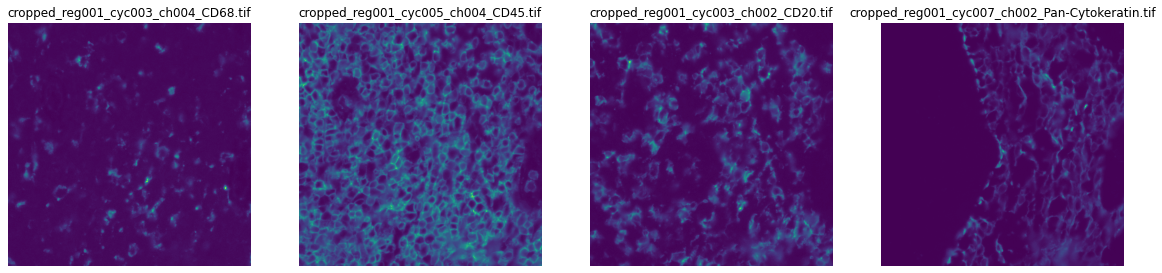

In [ ]:
# Visualise images
visimgs(files, filenames, save=False)

In [ ]:
# Normalise images with percentage-based linear method from csbdeep
norm_files = [normalize(file, 3, 99.8, clip=True) for file in files]

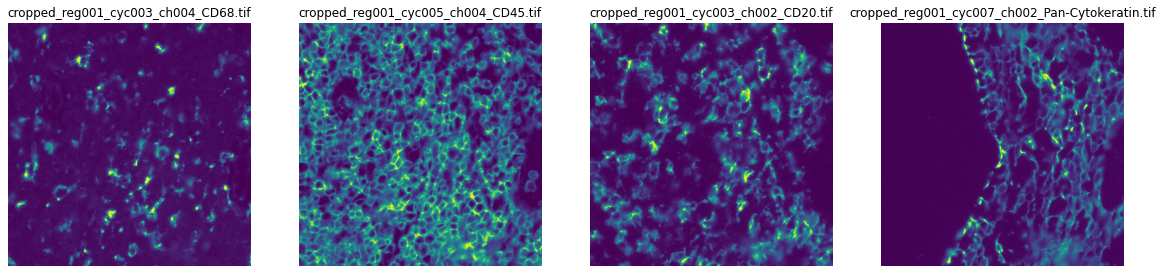

In [ ]:
# Visualise normalised images
visimgs(norm_files, filenames, save=False)

In [ ]:
# Combine normalised files
comfile = tifcomb(norm_files)

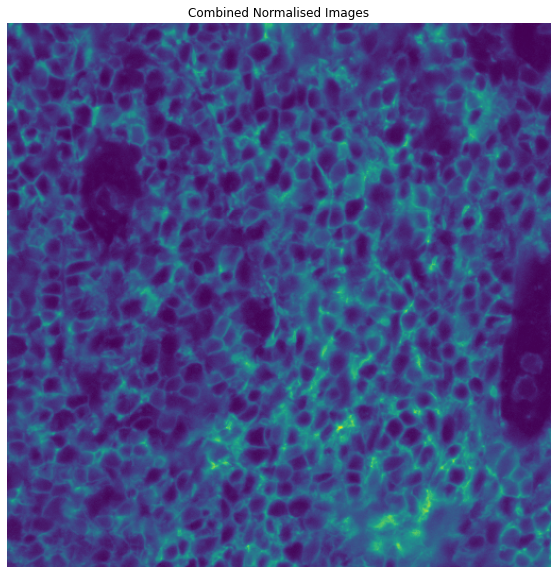

In [ ]:
save = False
savename = 'combnorm'

plt.figure(figsize=(10,10))
plt.imshow(comfile)
plt.axis('off')
plt.title('Combined Normalised Images')
if save:
    plt.savefig(savename+'.png', format='png')
plt.show()

## Save Combined File

In [ ]:
outdir = ''
outfilename = ''
imwrite(outdir + outfilename + 'tiffcomb.tif', comfile)